In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargar el dataset con nuevas columnas
df = pd.read_csv('./dataset_phishing_extended.csv')

print(f"\nDataset cargado:")
print(f"   - Filas: {df.shape[0]}")
print(f"   - Columnas: {df.shape[1]}")
print(f"\n   Columnas actuales:")
print(f"   {df.columns.tolist()}")



Dataset cargado:
   - Filas: 11430
   - Columnas: 25

   Columnas actuales:
   ['url', 'status', 'url_length', 'domain_length', 'path_length', 'count_dots', 'count_hyphens', 'count_subdomains', 'has_ip', 'has_at', 'has_double_slash', 'is_https', 'num_params', 'sensitive_words', 'special_chars', 'digit_ratio', 'vowels_in_domain', 'has_prefix_suffix', 'avg_word_len_path', 'count_ampersands', 'count_equals', 'is_shortened', 'shannon_entropy', 'relative_entropy', 'count_slashes']


In [6]:
# Modificar la columna 'status' para convertirla en binaria
df['status'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)

In [8]:
print(f"\nDistribución después de conversión:")
print(df['status'].value_counts())
print(f"\n   0 = legitimate")
print(f"   1 = phishing")


Distribución después de conversión:
status
0    5715
1    5715
Name: count, dtype: int64

   0 = legitimate
   1 = phishing


In [9]:
# Eliminar columna url
df = df.drop('url', axis=1)
print(f"Columna 'url' eliminada del dataset actual")

Columna 'url' eliminada del dataset actual


## Análisis exploratorio

In [11]:
# Verificar valores nulos
print(f"\nValores nulos por columna:")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("   ✓ No hay valores nulos en el dataset")
else:
    print(null_counts[null_counts > 0])


Valores nulos por columna:
   ✓ No hay valores nulos en el dataset


In [10]:
# Verificar valores infinitos
print(f"\nValores infinitos por columna:")
inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum()
if inf_counts.sum() == 0:
    print("   ✓ No hay valores infinitos en el dataset")
else:
    print(inf_counts[inf_counts > 0])


Valores infinitos por columna:
   ✓ No hay valores infinitos en el dataset


In [12]:
# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas de las características numéricas:")
print(df.describe())


Estadísticas descriptivas de las características numéricas:
             status    url_length  domain_length   path_length    count_dots  \
count  11430.000000  11430.000000   11430.000000  11430.000000  11430.000000   
mean       0.500000     61.120035      21.100175     23.146107      2.480665   
std        0.500022     55.292470      10.778330     27.738075      1.369685   
min        0.000000     12.000000       4.000000      0.000000      1.000000   
25%        0.000000     33.000000      15.000000      1.000000      2.000000   
50%        0.500000     47.000000      19.000000     17.000000      2.000000   
75%        1.000000     71.000000      24.000000     33.000000      3.000000   
max        1.000000   1641.000000     214.000000    602.000000     24.000000   

       count_hyphens  count_subdomains        has_ip        has_at  \
count   11430.000000      11430.000000  11430.000000  11430.000000   
mean        0.997550          1.052493      0.008486      0.021435   
std     

In [34]:
# Identificar columnas por tipo
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'status']
continuous_cols = [col for col in df.columns if df[col].nunique() > 2 and col != 'status']

print(f"\n✓ Columnas binarias detectadas: {len(binary_cols)}")
print(f"   {binary_cols}")
print(f"\n✓ Columnas continuas detectadas: {len(continuous_cols)}")
print(f"   {continuous_cols}")


✓ Columnas binarias detectadas: 6
   ['has_ip', 'has_at', 'has_double_slash', 'is_https', 'has_prefix_suffix', 'is_shortened']

✓ Columnas continuas detectadas: 17
   ['url_length', 'domain_length', 'path_length', 'count_dots', 'count_hyphens', 'count_subdomains', 'num_params', 'sensitive_words', 'special_chars', 'digit_ratio', 'vowels_in_domain', 'avg_word_len_path', 'count_ampersands', 'count_equals', 'shannon_entropy', 'relative_entropy', 'count_slashes']


## Normalización de características continuas

In [16]:
# Crear copia para normalización
df_normalized = df.copy()

In [21]:
# StandardScaler para columnas continuas
scaler_standard = StandardScaler()
X_continuous_standard = df_normalized[continuous_cols].copy()
df_normalized[continuous_cols] = scaler_standard.fit_transform(X_continuous_standard)

print(f"\n✓ StandardScaler aplicado a {len(continuous_cols)} columnas continuas")


✓ StandardScaler aplicado a 17 columnas continuas


In [22]:
print(f"\nEstadísticas después de StandardScaler:")
print(f"   Media promedio: {df_normalized[continuous_cols].mean().mean():.6f}")
print(f"   Desviación estándar promedio: {df_normalized[continuous_cols].std().mean():.6f}")


Estadísticas después de StandardScaler:
   Media promedio: -0.000000
   Desviación estándar promedio: 1.000044


## Verificación final

In [33]:
print(f"\nDataset final:")
print(f"   - Filas: {df_normalized.shape[0]}")
print(f"   - Columnas (features): {df_normalized.shape[1] - 1}")
print(f"   - Variable objetivo: status")


Dataset final:
   - Filas: 11430
   - Columnas (features): 23
   - Variable objetivo: status


In [25]:
print(f"\nDistribución de clases:")
print(df_normalized['status'].value_counts())
print(f"   Balance: {(df_normalized['status'].value_counts()[0] / len(df_normalized) * 100):.2f}% legitimate")
print(f"            {(df_normalized['status'].value_counts()[1] / len(df_normalized) * 100):.2f}% phishing")


Distribución de clases:
status
0    5715
1    5715
Name: count, dtype: int64
   Balance: 50.00% legitimate
            50.00% phishing


In [26]:
print(f"\nColumnas finales ({len(df_normalized.columns)}):")
for i, col in enumerate(df_normalized.columns, 1):
    print(f"   {i:2d}. {col}")


Columnas finales (24):
    1. status
    2. url_length
    3. domain_length
    4. path_length
    5. count_dots
    6. count_hyphens
    7. count_subdomains
    8. has_ip
    9. has_at
   10. has_double_slash
   11. is_https
   12. num_params
   13. sensitive_words
   14. special_chars
   15. digit_ratio
   16. vowels_in_domain
   17. has_prefix_suffix
   18. avg_word_len_path
   19. count_ampersands
   20. count_equals
   21. is_shortened
   22. shannon_entropy
   23. relative_entropy
   24. count_slashes


In [28]:
# Verificar que no hay valores nulos o infinitos
assert df_normalized.isnull().sum().sum() == 0, "ERROR: Hay valores nulos"
assert not np.isinf(df_normalized.select_dtypes(include=[np.number])).any().any(), "ERROR: Hay valores infinitos"
print(f"\nVerificación pasada: sin valores nulos ni infinitos")


Verificación pasada: sin valores nulos ni infinitos


## Guardar resultado

In [31]:
# Dataset con StandardScaler (recomendado para la mayoría de modelos)
output_standard = 'dataset_phishing_preprocessed.csv'
df_normalized.to_csv(output_standard, index=False)
print(f"\nDataset con StandardScaler guardado: {output_standard}")


Dataset con StandardScaler guardado: dataset_phishing_preprocessed.csv


In [30]:
# Dataset sin normalizar (para árboles de decisión y Random Forest)
output_raw = 'dataset_phishing_preprocessed_raw.csv'
df_raw = df.copy()
df_raw.to_csv(output_raw, index=False)
print(f"Dataset sin normalizar guardado: {output_raw}")

Dataset sin normalizar guardado: dataset_phishing_preprocessed_raw.csv


## Visualización de datos

In [32]:
# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

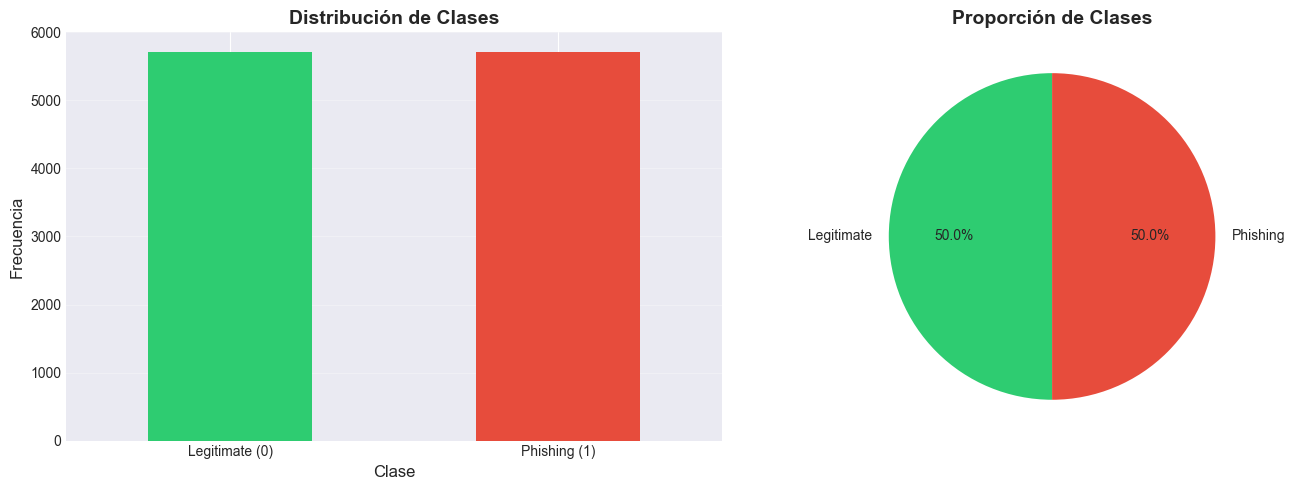

In [36]:
# 1. Distribución de clases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df_normalized['status'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Clases', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_xticklabels(['Legitimate (0)', 'Phishing (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pastel
df_normalized['status'].value_counts().plot(kind='pie', ax=axes[1], 
                                               autopct='%1.1f%%',
                                               labels=['Legitimate', 'Phishing'],
                                               colors=['#2ecc71', '#e74c3c'],
                                               startangle=90)
axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

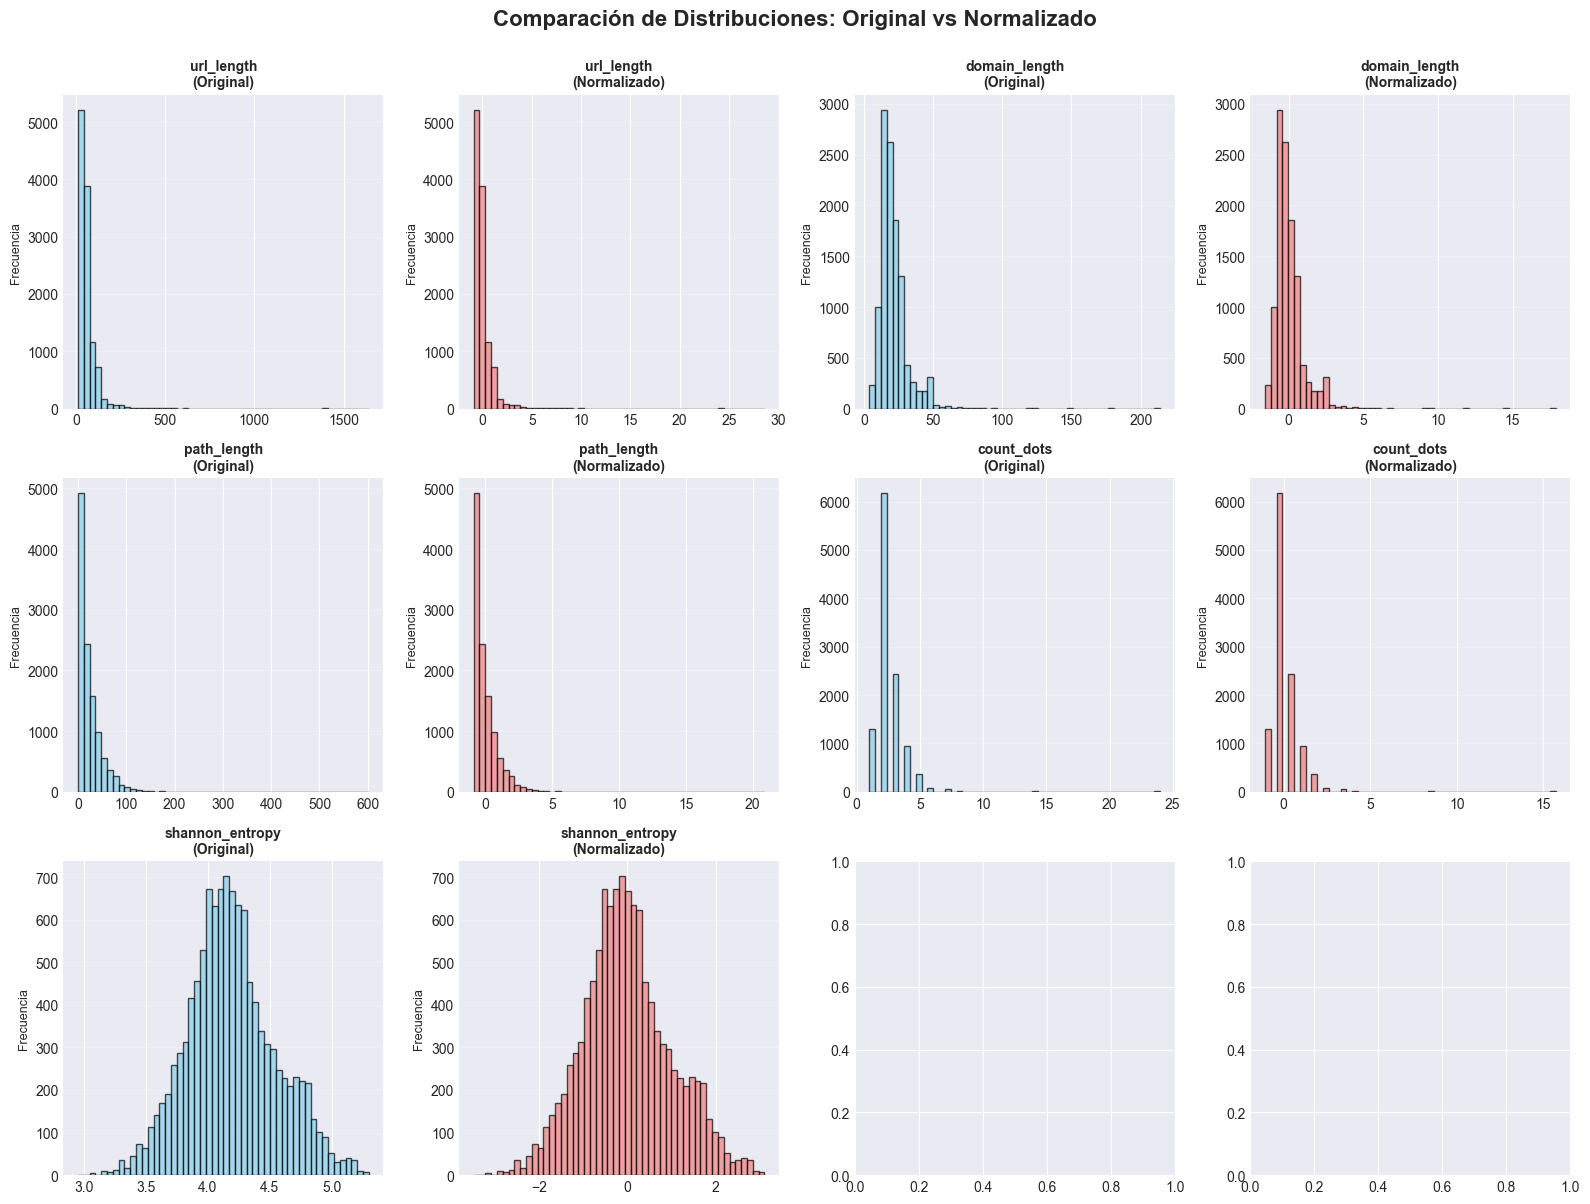

In [38]:
# 2. Distribución de algunas características clave (antes y después de normalización)
key_features = ['url_length', 'domain_length', 'path_length', 'count_dots', 'shannon_entropy']

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Original
    ax1 = axes[idx * 2]
    df_raw[feature].hist(bins=50, ax=ax1, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{feature}\n(Original)', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Frecuencia', fontsize=9)
    ax1.grid(axis='y', alpha=0.3)
    
    # Normalizado
    ax2 = axes[idx * 2 + 1]
    df_normalized[feature].hist(bins=50, ax=ax2, color='lightcoral', edgecolor='black', alpha=0.7)
    ax2.set_title(f'{feature}\n(Normalizado)', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Frecuencia', fontsize=9)
    ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Comparación de Distribuciones: Original vs Normalizado', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


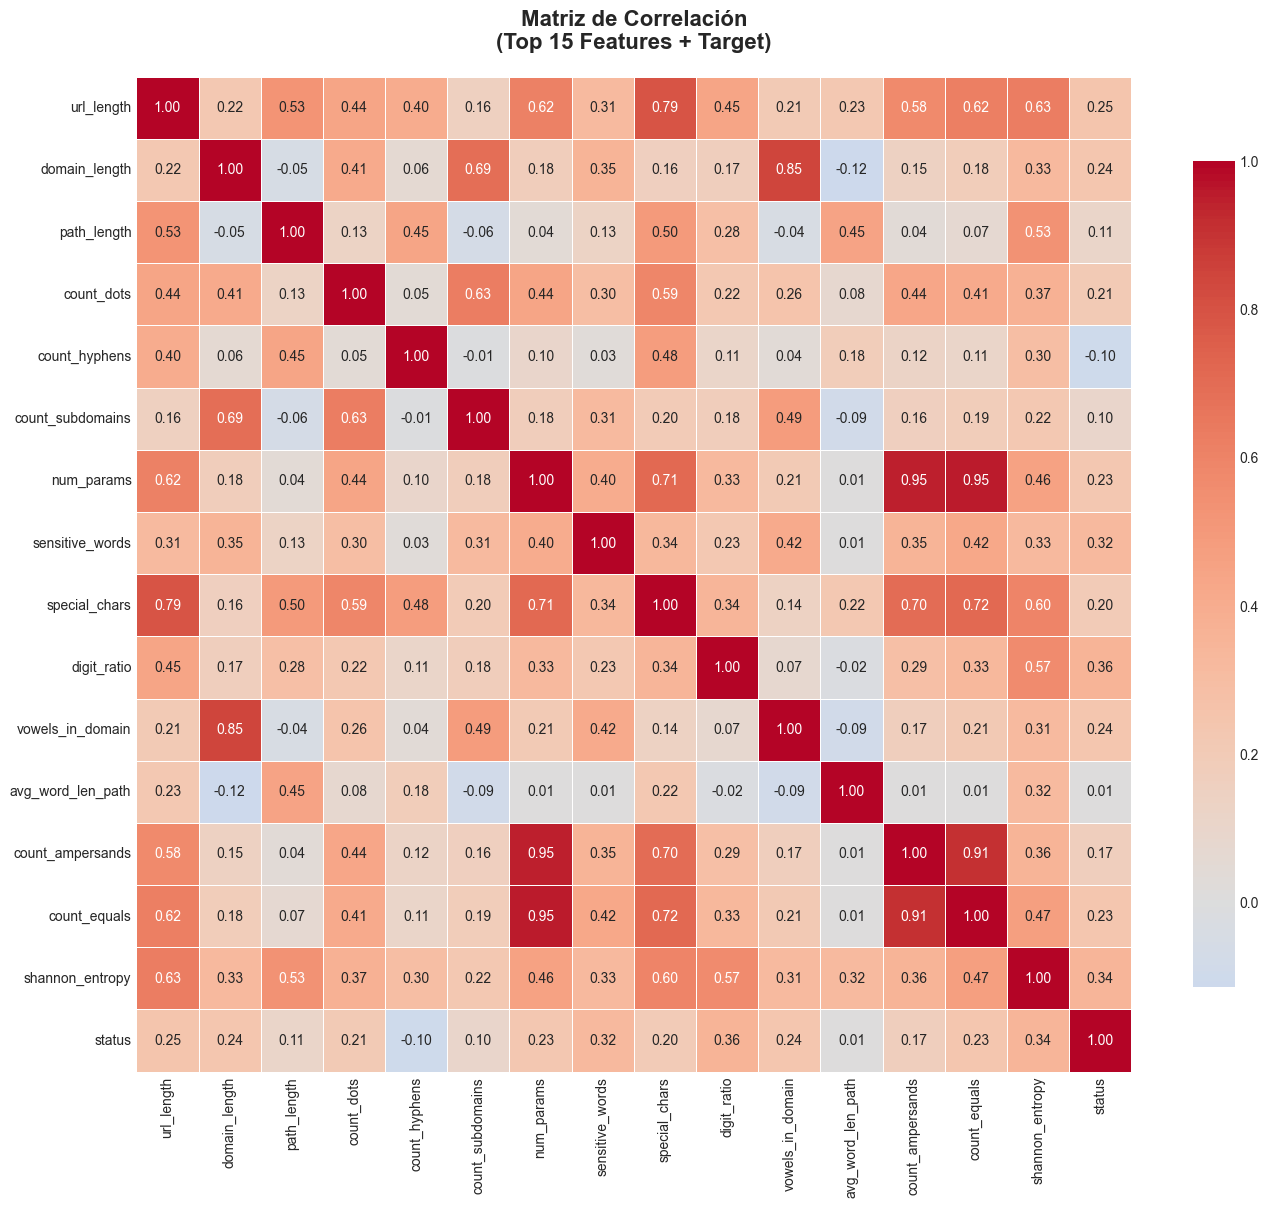

In [39]:
# 3. Matriz de correlación (primeras 15 features más importantes)
top_features = continuous_cols[:15] if len(continuous_cols) > 15 else continuous_cols
correlation_matrix = df_normalized[top_features + ['status']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación\n(Top 15 Features + Target)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

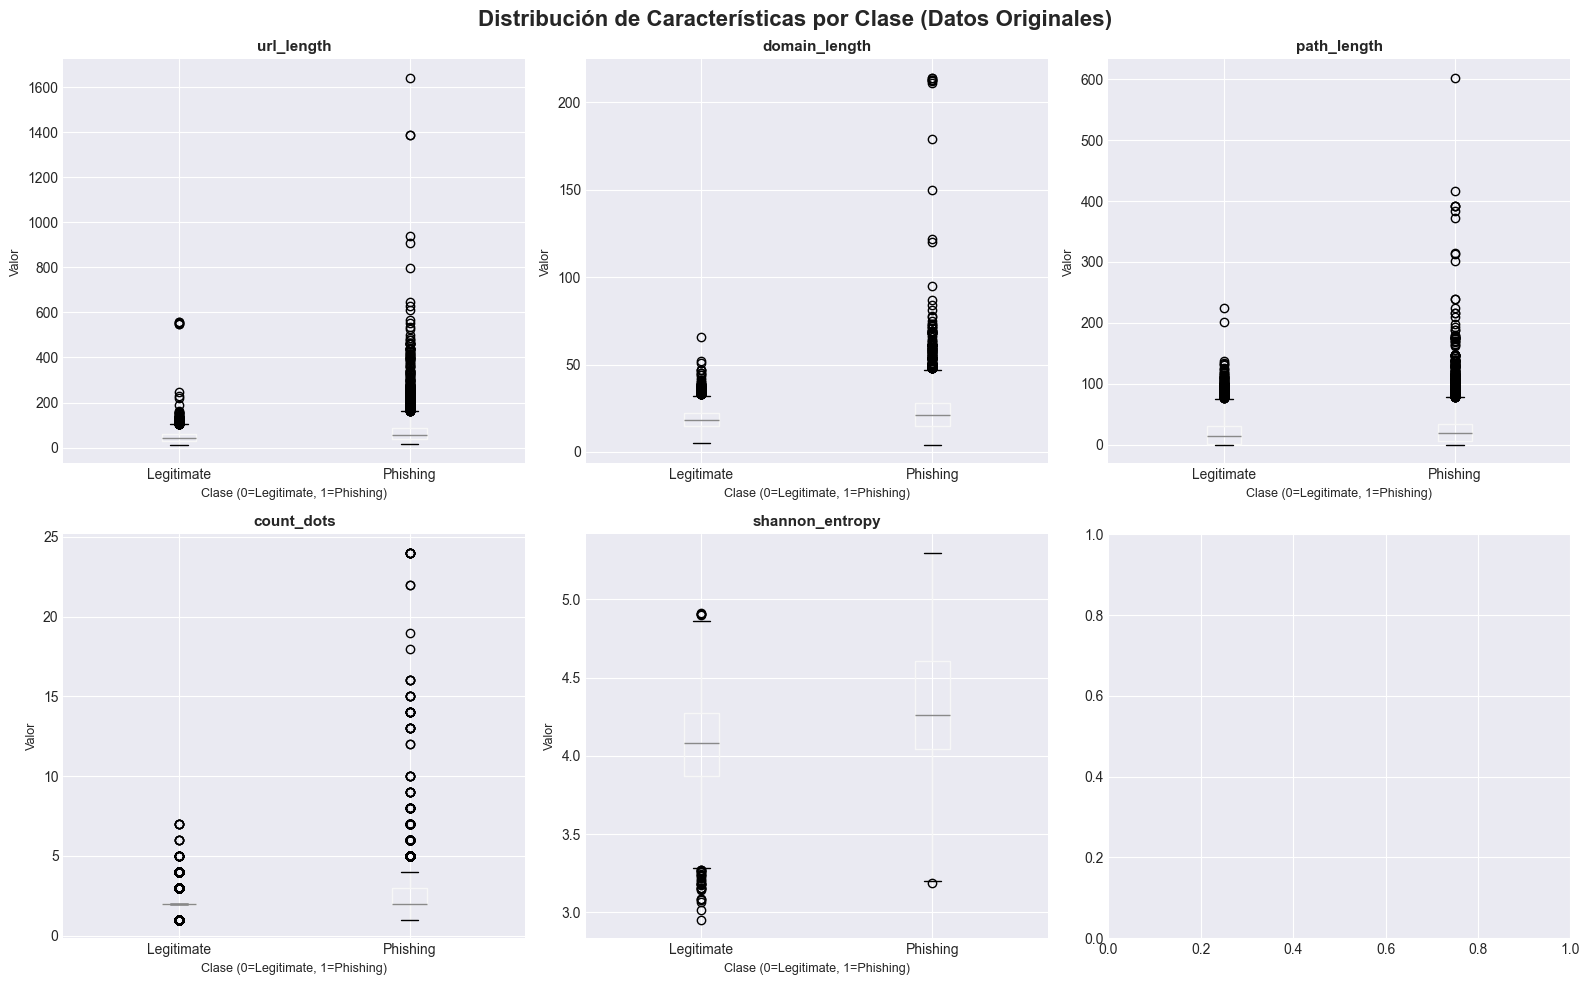

In [40]:
# 4. Boxplot de características por clase
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    df_raw.boxplot(column=feature, by='status', ax=axes[idx])
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Clase (0=Legitimate, 1=Phishing)', fontsize=9)
    axes[idx].set_ylabel('Valor', fontsize=9)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Legitimate', 'Phishing'])

plt.suptitle('Distribución de Características por Clase (Datos Originales)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()